In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
X = pd.read_csv("logisticX.csv", header=None)
y = pd.read_csv("logisticY.csv", header=None).values.flatten()

# Normalize features
X = (X - X.mean()) / X.std()

# Add bias term
m = X.shape[0]
X = np.hstack((np.ones((m, 1)), X))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    return -(1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        h = sigmoid(X @ theta)
        theta -= (learning_rate / m) * (X.T @ (h - y))
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

In [36]:
# Task 1: Logistic regression with learning rate 0.1
theta_initial = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 5000
theta_0_1, cost_history_0_1 = gradient_descent(X, y, theta_initial, learning_rate, iterations)

# Display results for Task 1
print("Task 1 Results:")
print("Final Parameters (theta):", theta_0_1)
print("Cost at Convergence:", cost_history_0_1[-1])

Task 1 Results:
Final Parameters (theta): [ 0.40097894  2.60087447 -2.73851913]
Cost at Convergence: 0.22832406029930574


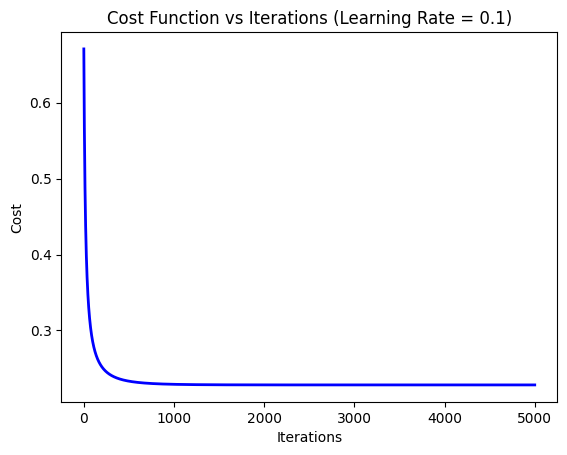

In [37]:
# Task 2: Plot cost function vs iteration graph for learning rate 0.1
plt.plot(range(1, iterations + 1), cost_history_0_1, color='blue', linewidth=2)
plt.title("Cost Function vs Iterations (Learning Rate = 0.1)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

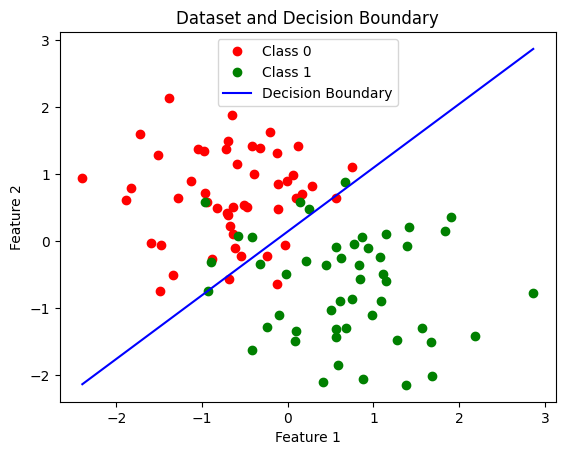

In [38]:
def plot_decision_boundary(X, y, theta):
    plt.plot(X[y == 0][:, 1], X[y == 0][:, 2], 'ro', label='Class 0')  # Red points for Class 0
    plt.plot(X[y == 1][:, 1], X[y == 1][:, 2], 'go', label='Class 1')  # Green points for Class 1

    # Decision boundary line
    x1_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]
    
    plt.plot(x1_vals, x2_vals, 'b-', label='Decision Boundary')
    plt.title("Dataset and Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, theta_0_1)


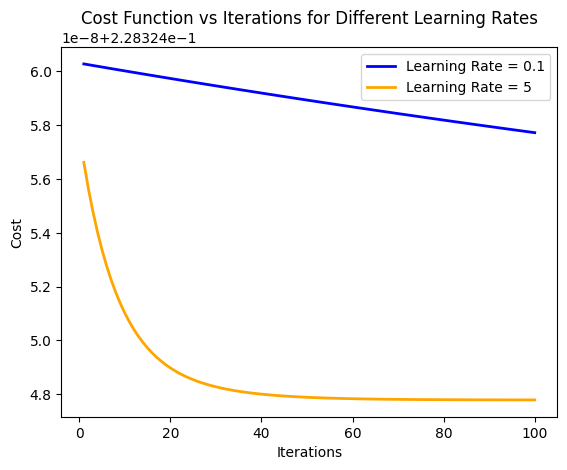

In [39]:
# Task 4: Train with learning rates 0.1 and 5 for 100 iterations
iterations_short = 100
theta_0_1_short, cost_0_1_short = gradient_descent(X, y, theta_initial, 0.1, iterations_short)
theta_5, cost_5 = gradient_descent(X, y, theta_initial, 5, iterations_short)

# Plot cost function comparison
plt.plot(range(1, iterations_short + 1), cost_0_1_short, color='blue', linewidth=2, label='Learning Rate = 0.1')
plt.plot(range(1, iterations_short + 1), cost_5, color='orange', linewidth=2, label='Learning Rate = 5')
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()


In [40]:
# Task 5: Confusion matrix and performance metrics
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

y_pred = predict(X, theta_0_1)

# Confusion matrix
tp = np.sum((y_pred == 1) & (y == 1))
tn = np.sum((y_pred == 0) & (y == 0))
fp = np.sum((y_pred == 1) & (y == 0))
fn = np.sum((y_pred == 0) & (y == 1))

confusion_matrix = np.array([[tn, fp], [fn, tp]])
print("Confusion Matrix:")
print(confusion_matrix)

# Performance metrics
accuracy = (tp + tn) / m
precision = tp / (tp + fp) if tp + fp > 0 else 0
recall = tp / (tp + fn) if tp + fn > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[45  5]
 [ 7 43]]
Accuracy: 0.8800
Precision: 0.8958
Recall: 0.8600
F1-Score: 0.8776
